In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import seaborn as sns

In [3]:
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 'evaluation',
 'Food analysis.ipynb',
 'README.md',
 'training',
 'validation']

### Data preparation

The dataset is seperated into 3 folders: training, validation and evaluation.
The images are named by convention as: {class_id}-{image_id}.jpg. Create subfolders inside training and validation for ImageDataGenerator to recognize classes.

In [14]:
NUM_CLASSES = 11

In [8]:
os.listdir('./training/')[0].split('_')[1]

'0.jpg'

In [11]:
def prepare_data(folder):
    
    # Creating subdirectories for 11 classes.
    for i in range(NUM_CLASSES):
        os.mkdir(path=folder + str(i))
        
    # Move the images to specific directories
    for path in os.listdir(folder):
        if os.path.isdir(folder + path) == False:
            file_array = path.split('_')
            os.rename(folder + path, folder + file_array[0] + '/' + file_array[1])

In [12]:
prepare_data('./training/')

In [13]:
prepare_data('./validation/')

### Finding data distribution

In [18]:
def get_data_distribution():
    
    training_per_class = {}
    validation_per_class = {}
    test_data = 0
    training_data = 0
    validation_data = 0
    
    for i in range(NUM_CLASSES):
        training_per_class[i] = len(os.listdir('./training/' + str(i)))
        validation_per_class[i] = len(os.listdir('./validation/' + str(i)))
        
    training_data = sum(list(training_per_class.values()))
    validation_data = sum(list(validation_per_class.values()))
    test_data = len(os.listdir('./evaluation/'))
    
    print('Training data size: ' + str(training_data))
    print('Validation data size: ' + str(validation_data))
    print('Test data size: ' + str(test_data))
    total = training_data + validation_data + test_data
    print('Training set proportion: ' + str(training_data / total))
    print('Validation set proportion: ' + str(validation_data / total))
    print('Testing set proportion: ' + str(test_data / total))

    return training_per_class, validation_per_class

In [19]:
training_per_class, validation_per_class = get_data_distribution()

Training data size: 9866
Validation data size: 3430
Test data size: 3347
Training set proportion: 0.5928017785255062
Validation set proportion: 0.2060926515652226
Testing set proportion: 0.20110556990927117


In [22]:
training_per_class = pd.DataFrame.from_dict(training_per_class, orient='index', columns=['freq'])
validation_per_class = pd.DataFrame.from_dict(validation_per_class, orient='index', columns=['freq'])

In [23]:
training_per_class['class'] = training_per_class.index
validation_per_class['class'] = validation_per_class.index

In [ ]:
training_per_class['freq'] = training_per_class['freq'] / sum(training_per_class['freq'])
validation_per_class['freq'] = training_per_class['freq'] / sum(validation_per_class['freq'])

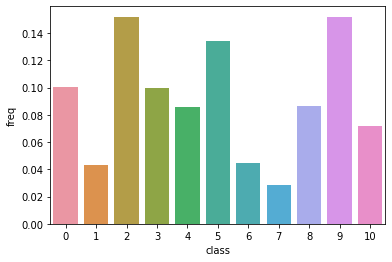

In [29]:
sns.barplot(x='class', y='freq', data=training_per_class)

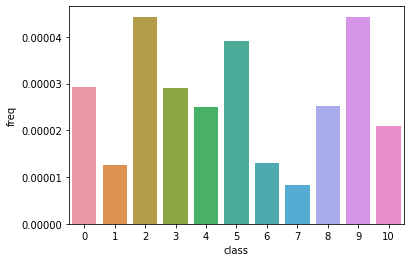

In [30]:
sns.barplot(x='class', y='freq', data=validation_per_class)

### Observations:

It appears that data in both training and validation set for each class is proportionally same. This will not cause any data mismatch problem while training model.

In [31]:
image = tf.keras.preprocessing.image.load_img('./training/0/0.jpg')
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255

Image shape: (512, 512, 3)


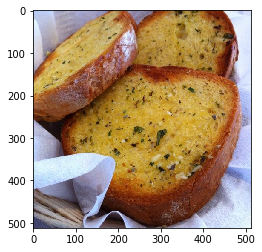

In [34]:
print("Image shape: " + str(image.shape))
plt.imshow(image)

Each image is of (512, 512, 3) shape